## Esercizio 11.2 - Fit polinomiale

In questo esercizio ho esteso il modello dell'esercizio precedente per ottenere un fit del polinomio
$$
f(x)=4-3x-2x^2+3x^3
$$
nell'intervallo $x \in [-1,1]$.

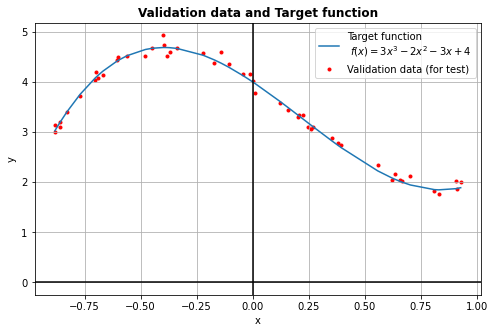

In [317]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================
# Define parameters of an ideal linear function.
# We want to predict them after
# ==============================================

# parametri
N_epochs = 8
N_train = 3000 # <<< train
N_valid = 50 # <<< test
Sigma = 0.1

# target parameters of 
# f(x) = 3x^3 - 2x^2 - 3x + 4 
# f(x) = ax^3 + bx^2 + cx + d
a = 3 
b = -2
c = -3
d = 4
def f(x):
    return a*x**3 + b*x**2 + c*x + d

# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)        # training inputs
x_valid = np.random.uniform(-1, 1, N_valid)        # ...
x_valid.sort()
#y_target = a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d 
y_target = f(x_valid)                              # target polinomial function

sigma = Sigma                                      # noise standard deviation
y_train = np.random.normal(f(x_train), sigma)      # array of measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)      # array of measures from which we want to test prediction ability of the NN

# plot validation and target dataset
plt.figure(figsize=(8,5))
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

In questo grafico è mostrato un confronto tra la funzione target che vogliamo fittare e i dati che utilizziamo per la validazione finale. Questi ultimi sono simili ai dati utilizzati per la calibrazione (*train*), ma sono molti meno e sono indipendenti dai essi.

In [318]:
# Use PYTHON 3.9.12

# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# Many neurons are needed to make the fitting job
# and activation functions need to be specifief.
# ==============================================

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# activation: relu-si, elu-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no, exponential-no
act = 'relu'
model.add(Dense(40, input_shape=(1,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
model.add(Dense(20, activation = act))
model.add(Dense(10, activation = act))
model.add(Dense(5, activation = act))
model.add(Dense(1, activation = act))

# compile the model choosing optimizer, loss and metrics objects
# optimizers: sgd-sì, rmsprop-sì, adam-?, adadelta-sì, adagrad-?, adamax-ni, nadam-sì, ftrl-no
opt = 'rmsprop'
# loss functios: mse-sì, mae-nì, msle-ni, logcosh-ni, kld-no(molto strana)
lf = 'mse'
model.compile(optimizer=opt, loss=lf, metrics=['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
# model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x=x_train, y=y_train, 
                        batch_size=32, epochs=N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_valid, y_valid))

Epoch 1/8
94/94 [==============================] - 4s 14ms/step - loss: 4.8506 - mse: 4.8506 - val_loss: 0.7539 - val_mse: 0.7539
Epoch 2/8
94/94 [==============================] - 1s 10ms/step - loss: 0.4219 - mse: 0.4219 - val_loss: 0.1101 - val_mse: 0.1101
Epoch 3/8
94/94 [==============================] - 1s 11ms/step - loss: 0.0896 - mse: 0.0896 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4/8
94/94 [==============================] - 1s 8ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 5/8
94/94 [==============================] - 1s 9ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 6/8
94/94 [==============================] - 1s 9ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 7/8
94/94 [==============================] - 1s 10ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 8/8
94/94 [==============================] - 1s 10ms/step - loss: 0.0184 - mse: 0.0184 

TEST DATA evaluation
Test loss:      0.009653832763433456
Test accuracy:  0.009653832763433456

EXACT CURVE evaluation
Test loss:      0.0032423976808786392
Test accuracy:  0.0032423976808786392


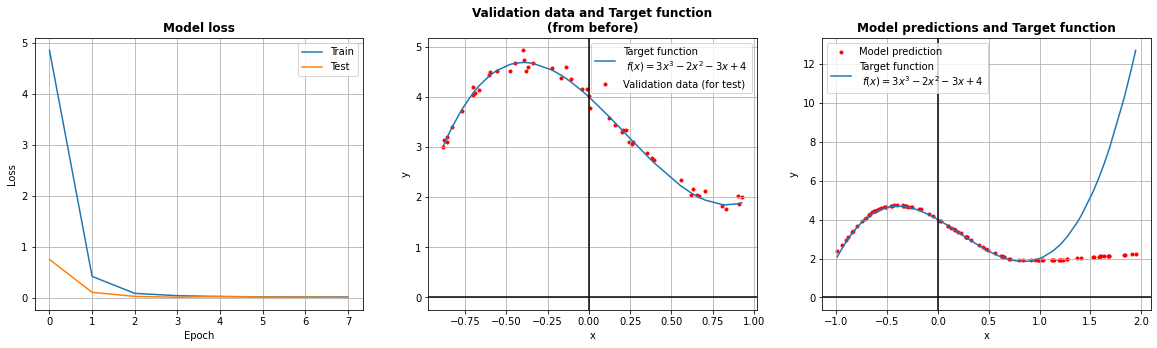

In [320]:
# ==============================================
# Return Weights and Biases
# ==============================================

# print("Guessed parameters")
w = model.get_weights()
# print(w)

# ==============================================
# EVALUATE MODEL
# ==============================================

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ==============================================
# Training history
# ==============================================

plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted) # ha dimensione diversa da x_predicted se non finisco con un solo nodo

# (re)plot validation and target dataset
plt.subplot(1,3,2)
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function\n(from before)", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()

# plot
plt.subplot(1,3,3)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted) # target polinomial function
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

Nel grafico a **sinistra** è riportato l'andamento delle *loss* (misurate con la metrica scelta, *MeanSquareError*) sui dati di calibrazione e su quelli di test, in funzione dell'epoca. In una calibrazione efficace entrambe convergono a un valore più basso possibile con una discesa circa esponenziale. Al **centro** è riportato lo stesso grafico di sopra, per memo. A **destra** è riportato il grafico che mostra le predizioni del modello su un dominio esteso $[-1,2]$ rispetto a quello su cui ho eseguito la calibrazione $[-1,1]$: in questo caso, ottenere una buona predizione anche al di fuori del dominio di *train* è praticamente impossibile con gli strumenti che stiamo utilizzando.

### Osservazioni

Dopo aver preso un po di dimestichezza con la nuova rete mi sono proposto di ottenere una determina accuratezza di test con un minor tempo di calcolo possibile.
Ho cercato di portare vicino a $0.01$ l'**accuracy del test** su nuovi dati generati dal modello.

Ho osservato che oltre un certo numero di **epoche** la riduzione dell'accuratezza non è significativa, quindi ho fissato le epoche a 8.
Ho poi verificato che un numero molto alto di **nodi** combinato con una ridotta **profondità** della rete non era sufficiente a garantire il risultato a cui puntavo, quindi ho fissato il numero di **livelli** a 5.
Confrontando diverse **funzioni di attivazione** ho visto che i risultati migliori erano garantiti dalla `relu`, seguita dalla `elu`.
Per quanto riguarda gli **ottimizzatori**, non ho notato significative differenze tra l'uno e l'altro (a parte che non sono riuscito a far funzionare la rete con adam e adagrad), eccetto `ftrl` che mi ha dato pessimi risultati rispetto agli altri. Tra le **loss function** che ho provato quella che ha dato i risultati migliori è stata la `mse`, la stessa che ho usato durante tutte le precedenti fasi di calibrazione.

Alla fine delle prove, ho scelto di tenere i parametri che sono rimasti salvati nell'attuale versione di questo Notebook.

In ogni caso ho osservato che la stima dell'accuratezza balla tra $0.008$ e $0.017$ anche una volta fissati i parametri della rete: questo è dovuto al generatore di numeri casuali di Python, che non riparte sempre dallo stesso punto, come faceva il nostro.

Ho provato infine a modificare $\sigma$ e ho potuto osservare che il modello riesce a fittare comunque bene la curva teorica benché naturalmente le loss functions convergano a valori più alti di prima. Questo vale finchè il rumore non diventa molto l'ampiezza della curva polinomiale ($\sigma \sim 2$).

### Conclusioni

All'interno dell'intervallo su cui ho eseguito la calibrazione è stato relativamente semplice ottenere un modello capace di predirre dati con buona accuratezza. Viceversa, nessuno dei modelli che ho collaudato è stato in grado di predirre l'andamento ascendente del polinomio per $x>1$.
